##  PCA Aanlysis to reduce dimensionality
the aim is to apply PCA and see if improves the results of our trainning model

-1 step load cleanning data 231018_clean_table_for_analysis.csv

-2 step create variable severe based on  grav

-3 step prepare and run PCA

-4 step to be done...(working in progress)

In [1]:
#Import libraires
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# load Data
df = pd.read_csv("./data/231018_clean_table_for_analysis.csv", index_col=0, low_memory=False)

In [3]:
df.head(10)

,place,catu,sexe,an_nais,trajet,locp,an,mois,jour,lum,...,choc,manv,date,is_holiday,holiday,actp,num_veh,hrmn,grav,etatp
Num_Acc,,,,,,,,,,,,,,,,,,,,,
201900000001,2.0,2,2,2002,0.0,-1.0,2019,11,30,4,...,5.0,23.0,2019-11-30,False,NaN,0,14,90,3,0
201900000001,1.0,1,2,1993,5.0,-1.0,2019,11,30,4,...,5.0,23.0,2019-11-30,False,NaN,0,14,90,3,0
201900000001,1.0,1,1,1959,0.0,-1.0,2019,11,30,4,...,3.0,11.0,2019-11-30,False,NaN,0,0,90,0,0
201900000002,1.0,1,2,1994,0.0,-1.0,2019,11,30,3,...,1.0,0.0,2019-11-30,False,NaN,0,0,170,3,0
201900000003,1.0,1,1,1996,0.0,-1.0,2019,11,28,1,...,1.0,2.0,2019-11-28,False,NaN,1,0,915,0,0
201900000003,2.0,2,2,1930,9.0,-1.0,2019,11,28,1,...,1.0,2.0,2019-11-28,False,NaN,1,0,915,3,0
201900000003,1.0,1,1,1995,9.0,-1.0,2019,11,28,1,...,4.0,2.0,2019-11-28,False,NaN,1,14,915,3,0
201900000003,1.0,1,1,1966,1.0,-1.0,2019,11,28,1,...,4.0,23.0,2019-11-28,False,NaN,1,27,915,0,0
201900000004,1.0,1,1,1993,0.0,-1.0,2019,11,30,5,...,4.0,23.0,2019-11-30,False,NaN,1,0,1220,0,0


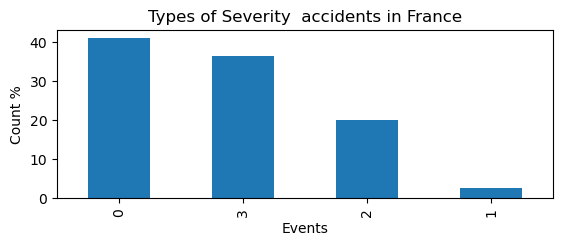

In [9]:
# checking the types of accidents based on their gravity 
import matplotlib.pyplot as plt
event_counts = df['grav'].value_counts()
event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplot(2,1,1)
event_percentages.plot.bar()
#labels = ['unscathed','Killed','Hospitalized','light injury']
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)))#, labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Types of Severity  accidents in France')
# Display the plot
plt.show()



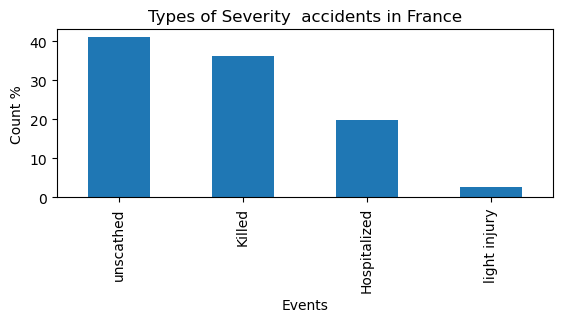

In [10]:
import matplotlib.pyplot as plt
event_counts = df['grav'].value_counts()
event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplot(2,1,1)
event_percentages.plot.bar()
labels = ['unscathed','Killed','Hospitalized','light injury']
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Types of Severity  accidents in France')
# Display the plot
plt.show()

In [12]:
import numpy as np
# create target variable
# create a new variable for the severity ['Grav'] of accidents ( Sereve, non-severe) as a possible target variable
#### 0 = non severe and 1 equal to severe
df['Severe'] = np.where(df['grav'].isin([0, 1]), 0, 1)

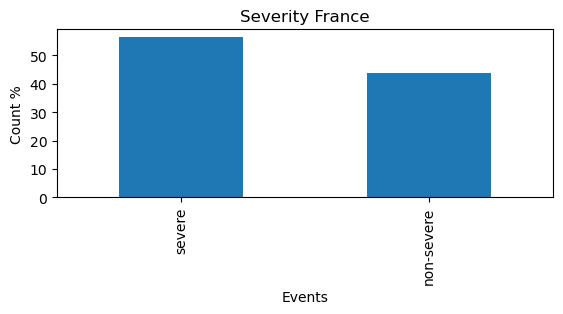

In [13]:
# exploring severe cases in % 
event_counts = df['Severe'].value_counts()
event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplot(2,1,1)
event_percentages.plot.bar()
labels = ['severe','non-severe']
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Severity France')
# Display the plot
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2421684 entries, 201900000001 to 201800055766
Data columns (total 40 columns):
 #   Column      Dtype  
---  ------      -----  
 0   place       float64
 1   catu        int64  
 2   sexe        int64  
 3   an_nais     int64  
 4   trajet      float64
 5   locp        float64
 6   an          int64  
 7   mois        int64  
 8   jour        int64  
 9   lum         int64  
 10  agg         int64  
 11  int         int64  
 12  atm         float64
 13  col         float64
 14  dep         int64  
 15  catr        float64
 16  circ        float64
 17  nbv         float64
 18  vosp        float64
 19  prof        float64
 20  plan        float64
 21  surf        float64
 22  infra       float64
 23  situ        float64
 24  senc        float64
 25  catv        int64  
 26  occutc      float64
 27  obs         float64
 28  obsm        float64
 29  choc        float64
 30  manv        float64
 31  date        object 
 32  is_holiday  bool

In [15]:
df['date']= pd.to_datetime(df.date,format='%Y-%m-%d')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2421684 entries, 201900000001 to 201800055766
Data columns (total 40 columns):
 #   Column      Dtype         
---  ------      -----         
 0   place       float64       
 1   catu        int64         
 2   sexe        int64         
 3   an_nais     int64         
 4   trajet      float64       
 5   locp        float64       
 6   an          int64         
 7   mois        int64         
 8   jour        int64         
 9   lum         int64         
 10  agg         int64         
 11  int         int64         
 12  atm         float64       
 13  col         float64       
 14  dep         int64         
 15  catr        float64       
 16  circ        float64       
 17  nbv         float64       
 18  vosp        float64       
 19  prof        float64       
 20  plan        float64       
 21  surf        float64       
 22  infra       float64       
 23  situ        float64       
 24  senc        float64       
 25  ca

In [ ]:
# drop holiday
df = df.drop(['holiday'], axis=1)

## PCA reduction

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select relevant features (numeric columns)
numeric_columns = df.select_dtypes(include=['number'])

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_columns)

# Define the number of components for PCA
n_components = 10  # You can adjust this based on your requirements

# Perform PCA
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_scaled)

In [18]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.09926219 0.06299477 0.05140206 0.04646315 0.04438205 0.0359261
 0.03450641 0.03313143 0.03152851 0.03039375]


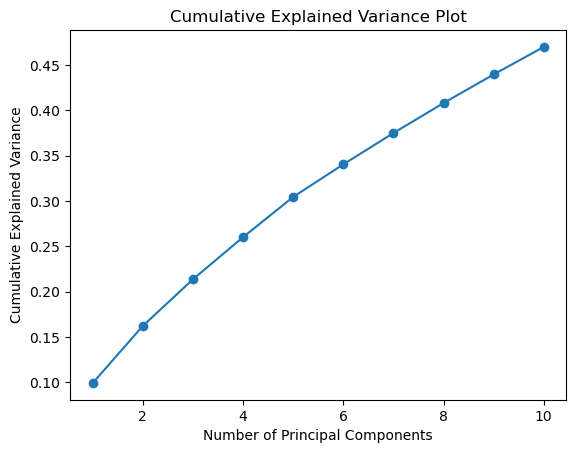

In [27]:
cumulative_variance = explained_variance.cumsum()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.show()

## PCA data for running the models
you need to use data PCA and the target variable created here Severe

 X_train, X_test, y_train, y_test = train_test_split(data_pca, target_column, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_pca, target_column, test_size=0.2, random_state=42)